In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Friend_Training_.csv")

In [3]:
df.head()

,Person_1,Person_2,Friends,Years_Known,Type_Of_Interaction,Duration_Of_Interaction,Moon_Phase
0,Eric,Rachel,True,1.65,Class,0.00,Waxing_Gibbous
1,Justin,Helen,False,1.94,Over a Meal,7.29,First_Quarter
2,Austin,Theresa,False,1.28,Over a Meal,6.08,Waxing_Gibbous
3,Robert,Rebecca,False,0.00,At Work,7.35,Full_Moon
4,Jesse,Kathleen,True,3.41,Over a Meal,9.82,Waxing_Gibbous


In [4]:
test = pd.read_csv("Friend_Testing_.csv")

In [5]:
test.head()

,Person_1,Person_2,Years_Known,Type_Of_Interaction,Duration_Of_Interaction,Moon_Phase,ID
0,Matthew,Julia,1.06,Party,10.32,Waning_Cresent,1
1,Scott,Samantha,5.06,At Work,9.41,Waxing_Gibbous,2
2,Timothy,Sarah,2.72,Party,16.21,Full_Moon,3
3,Robert,Mary,0.49,In Passing,7.97,New_Moon,4
4,Billy,Ruth,0.00,In Passing,5.28,Waning_Cresent,5


In [6]:
df.describe()

,Years_Known,Duration_Of_Interaction
count,54697.000000,54697.000000
mean,3.316479,10.050735
std,2.618973,4.908453
min,0.000000,0.000000
25%,1.060000,6.630000
50%,3.060000,9.990000
75%,5.130000,13.390000
max,15.260000,30.860000


In [7]:
test.describe()

,Years_Known,Duration_Of_Interaction,ID
count,54697.000000,54697.000000,54702.00000
mean,3.316479,10.050735,27351.50000
std,2.618973,4.908453,15791.25155
min,0.000000,0.000000,1.00000
25%,1.060000,6.630000,13676.25000
50%,3.060000,9.990000,27351.50000
75%,5.130000,13.390000,41026.75000
max,15.260000,30.860000,54702.00000


In [8]:
df['Type_Of_Interaction'].describe()

count     54697
unique        6
top       Class
freq       9283
Name: Type_Of_Interaction, dtype: object

In [9]:
df['Type_Of_Interaction'].unique()

array(['Class', 'Over a Meal', 'At Work', 'In Passing', 'Party',
       'Social_Media'], dtype=object)

In [10]:
df['Moon_Phase'].unique()

array(['Waxing_Gibbous', 'First_Quarter', 'Full_Moon', 'Waning_Cresent',
       'New_Moon', 'Waning_Gibbous', 'Third_Quarter', 'Waxing_Cresent'], dtype=object)

In [11]:
test['Type_Of_Interaction'].unique()

array(['Party', 'At Work', 'In Passing', 'Over a Meal', 'Class',
       'Social_Media', nan], dtype=object)

In [12]:
test['Moon_Phase'].unique()

array(['Waning_Cresent', 'Waxing_Gibbous', 'Full_Moon', 'New_Moon',
       'First_Quarter', 'Third_Quarter', 'Waxing_Cresent',
       'Waning_Gibbous', nan], dtype=object)

In [13]:
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

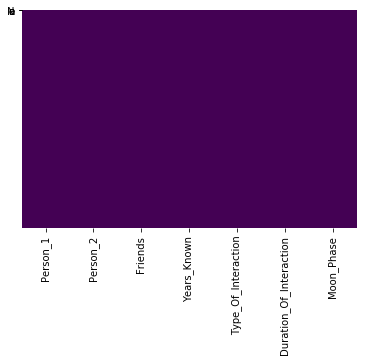

In [15]:
sns.heatmap(df.isnull(), cbar = False,cmap = 'viridis',yticklabels='None')

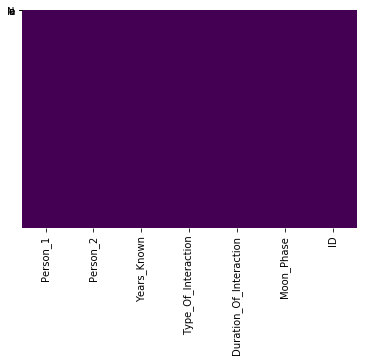

In [16]:
sns.heatmap(test.isnull(), cbar = False,cmap = 'viridis',yticklabels='None')

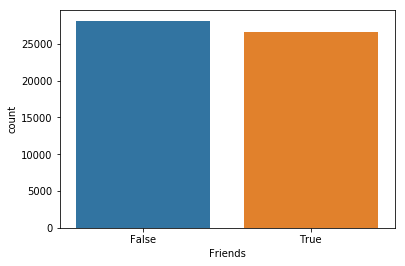

In [17]:
sns.countplot(x='Friends',data=df)

In [18]:
df.head()

,Person_1,Person_2,Friends,Years_Known,Type_Of_Interaction,Duration_Of_Interaction,Moon_Phase
0,Eric,Rachel,True,1.65,Class,0.00,Waxing_Gibbous
1,Justin,Helen,False,1.94,Over a Meal,7.29,First_Quarter
2,Austin,Theresa,False,1.28,Over a Meal,6.08,Waxing_Gibbous
3,Robert,Rebecca,False,0.00,At Work,7.35,Full_Moon
4,Jesse,Kathleen,True,3.41,Over a Meal,9.82,Waxing_Gibbous


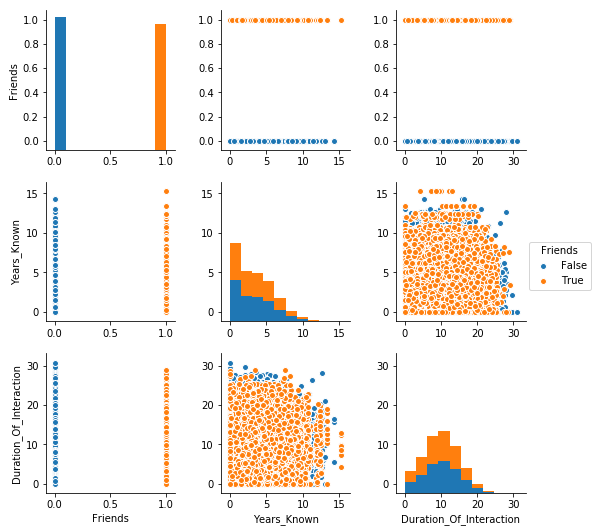

In [19]:
sns.pairplot(df,hue='Friends')

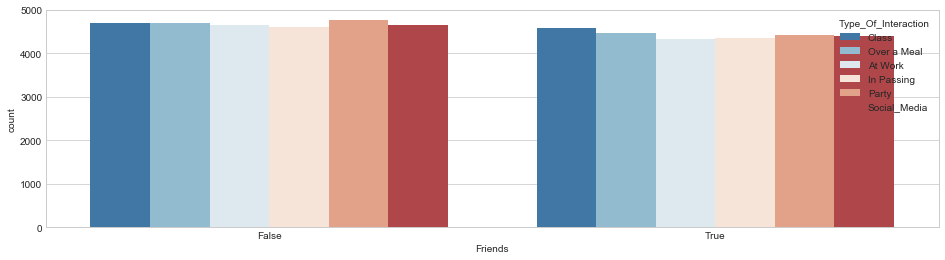

In [20]:
plt.figure(figsize=(16,4))
sns.set_style('whitegrid')
sns.countplot(x='Friends',hue='Type_Of_Interaction',data=df,palette='RdBu_r')

In [21]:
Type_Of_Interaction = pd.get_dummies(df['Type_Of_Interaction'])

In [22]:
Moon_Phase = pd.get_dummies(df['Moon_Phase'])

In [23]:
df.drop(['Type_Of_Interaction','Moon_Phase','Person_1','Person_2'],axis=1,inplace=True)

In [24]:
df = pd.concat([df,Type_Of_Interaction,Moon_Phase],axis=1)

In [25]:
df.head()

,Friends,Years_Known,Duration_Of_Interaction,At Work,Class,In Passing,Over a Meal,Party,Social_Media,First_Quarter,Full_Moon,New_Moon,Third_Quarter,Waning_Cresent,Waning_Gibbous,Waxing_Cresent,Waxing_Gibbous
0,True,1.65,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,False,1.94,7.29,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,False,1.28,6.08,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,False,0.00,7.35,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,True,3.41,9.82,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [26]:
friends = pd.get_dummies(df['Friends'],drop_first=True)

In [27]:
friends.columns = ['Friends']

In [28]:
friends.head()

,Friends
0,1
1,0
2,0
3,0
4,1


In [29]:
df.drop(['Friends'],axis=1,inplace=True)

In [30]:
df = pd.concat([friends,df],axis=1)

In [31]:
df.head(30)

,Friends,Years_Known,Duration_Of_Interaction,At Work,Class,In Passing,Over a Meal,Party,Social_Media,First_Quarter,Full_Moon,New_Moon,Third_Quarter,Waning_Cresent,Waning_Gibbous,Waxing_Cresent,Waxing_Gibbous
0,1,1.65,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1.94,7.29,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,1.28,6.08,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0.00,7.35,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,3.41,9.82,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,1,0.46,4.50,0,0,1,0,0,0,1,0,0,0,0,0,0,0
6,1,2.21,14.54,0,1,0,0,0,0,0,0,0,0,1,0,0,0
7,0,3.33,6.92,1,0,0,0,0,0,0,0,1,0,0,0,0,0
8,1,0.00,10.04,1,0,0,0,0,0,1,0,0,0,0,0,0,0
9,1,1.19,5.69,1,0,0,0,0,0,0,0,0,0,0,0,0,1


## Years_Known aur Duration_Of_Interaction ko impute kar jahan 0 hai

In [32]:
(df.Duration_Of_Interaction == 0.00).value_counts()

False    53463
True      1234
Name: Duration_Of_Interaction, dtype: int64

In [33]:
(df.Years_Known == 0.00).value_counts()

False    46418
True      8279
Name: Years_Known, dtype: int64

In [34]:
df['Duration_Of_Interaction'].groupby(df['Friends']).mean()

Friends
0    10.072452
1    10.027749
Name: Duration_Of_Interaction, dtype: float64

In [35]:
df['Years_Known'].groupby(df['Friends']).mean()

Friends
0    3.271789
1    3.363782
Name: Years_Known, dtype: float64

In [36]:
def impute_doi(cols):
    Duration_Of_Interaction = cols[0]
    Friends = cols[1]
    
    if Duration_Of_Interaction == 0.00:

        if Friends == 1:
            return 10.027749

        else:
            return 10.072452

    else:
        return Duration_Of_Interaction

In [37]:
df['Duration_Of_Interaction'] = df[['Duration_Of_Interaction','Friends']].apply(impute_doi,axis=1)

In [38]:
df.head()

,Friends,Years_Known,Duration_Of_Interaction,At Work,Class,In Passing,Over a Meal,Party,Social_Media,First_Quarter,Full_Moon,New_Moon,Third_Quarter,Waning_Cresent,Waning_Gibbous,Waxing_Cresent,Waxing_Gibbous
0,1,1.65,10.027749,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1.94,7.290000,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,1.28,6.080000,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0.00,7.350000,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,3.41,9.820000,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [39]:
def impute_yk(cols):
    Years_Known = cols[0]
    Friends = cols[1]
    
    if Years_Known == 0.00:

        if Friends == 1:
            return 10.363782

        else:
            return 3.271789

    else:
        return Years_Known

In [40]:
df['Years_Known'] = df[['Years_Known','Friends']].apply(impute_yk,axis=1)

In [41]:
df.head()

,Friends,Years_Known,Duration_Of_Interaction,At Work,Class,In Passing,Over a Meal,Party,Social_Media,First_Quarter,Full_Moon,New_Moon,Third_Quarter,Waning_Cresent,Waning_Gibbous,Waxing_Cresent,Waxing_Gibbous
0,1,1.650000,10.027749,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1.940000,7.290000,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,1.280000,6.080000,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,3.271789,7.350000,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,3.410000,9.820000,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [42]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Friends',axis=1), 
                                                    df['Friends'], test_size=0.30, 
                                                    random_state=101)

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth = 60)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.61547836684948198